# Contribution to the value added tax by income decile

# Import general modules


In [1]:
from __future__ import division

import pandas
import seaborn


# Import modules specific to Openfisca

In [2]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario


# Import new colors

In [3]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Select variables for simulation

In [4]:
simulated_variables = [
    'tva_taux_plein',
    'tva_taux_intermediaire',
    'tva_taux_reduit',
    'tva_taux_super_reduit',
    'rev_disp_loyerimput',
    'tva_total'
    ]


# Compute share of value added tax in households' disposable income

 Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2000 


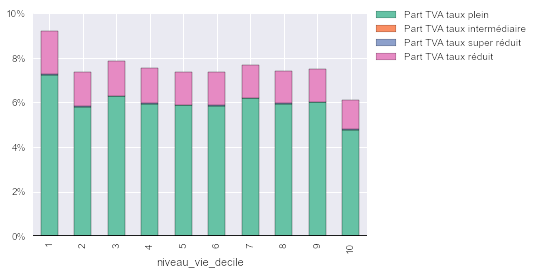

 Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2005 


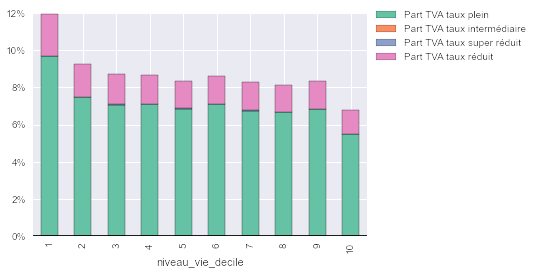

 Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2011 


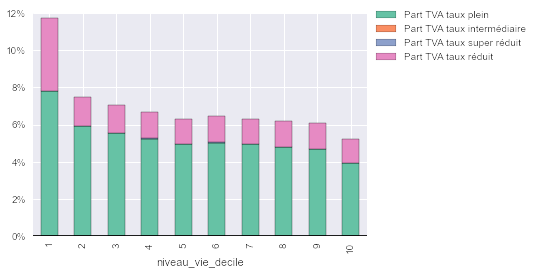

In [5]:
for year in [2000, 2005, 2011]:
    survey_scenario = SurveyScenario.create(year = year)
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['niveau_vie_decile'])
            ])
    taxes_indirectes = pivot_table.T

    taxes_indirectes[u'Part TVA taux super réduit'] = \
        taxes_indirectes['tva_taux_super_reduit'] / taxes_indirectes['rev_disp_loyerimput']
    taxes_indirectes[u'Part TVA taux réduit'] = \
        taxes_indirectes['tva_taux_reduit'] / taxes_indirectes['rev_disp_loyerimput']
    taxes_indirectes[u'Part TVA taux intermédiaire'] = \
        taxes_indirectes['tva_taux_intermediaire'] / taxes_indirectes['rev_disp_loyerimput']
    taxes_indirectes[u'Part TVA taux plein'] = \
        taxes_indirectes['tva_taux_plein'] / taxes_indirectes['rev_disp_loyerimput']

    df_to_graph = taxes_indirectes[[u'Part TVA taux plein', u'Part TVA taux intermédiaire',
        u'Part TVA taux super réduit', u'Part TVA taux réduit']]

    print(''' Part de chaque type de TVA dans le revenu disponible des ménages pour l'année {} ''').format(year)
    graph_builder_bar(df_to_graph)


 Part de chaque type de TVA dans la contribution totale en TVA des ménages pour l'année 2000 


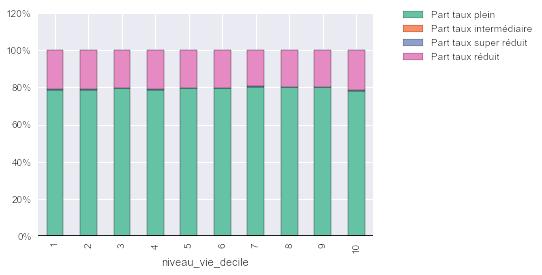

 Part de chaque type de TVA dans la contribution totale en TVA des ménages pour l'année 2005 


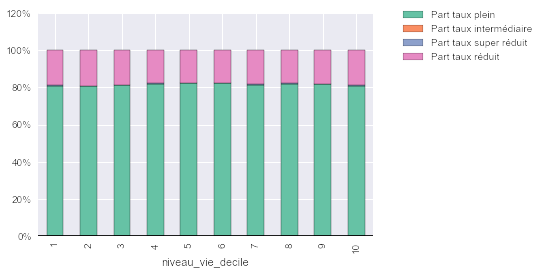

 Part de chaque type de TVA dans la contribution totale en TVA des ménages pour l'année 2011 


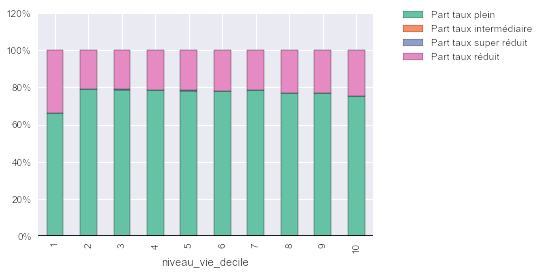

In [6]:
for year in [2000, 2005, 2011]:
    survey_scenario = SurveyScenario.create(year = year)
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['niveau_vie_decile'])
            ])
    taxes_indirectes = pivot_table.T

    taxes_indirectes[u'Part taux super réduit'] = \
        taxes_indirectes['tva_taux_super_reduit'] / taxes_indirectes['tva_total']
    taxes_indirectes[u'Part taux réduit'] = \
        taxes_indirectes['tva_taux_reduit'] / taxes_indirectes['tva_total']
    taxes_indirectes[u'Part taux intermédiaire'] = \
        taxes_indirectes['tva_taux_intermediaire'] / taxes_indirectes['tva_total']
    taxes_indirectes[u'Part taux plein'] = \
        taxes_indirectes['tva_taux_plein'] / taxes_indirectes['tva_total']

    df_to_graph = taxes_indirectes[[u'Part taux plein', u'Part taux intermédiaire',
        u'Part taux super réduit', u'Part taux réduit']]

    print(''' Part de chaque type de TVA dans la contribution totale en TVA des ménages pour l'année {} ''').format(year)
    graph_builder_bar(df_to_graph)
